In [176]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import operator
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict
from patsy import dmatrices

In [93]:
%matplotlib inline

In [3]:
with open("bigpicklefile.pkl", 'r') as picklefile: 
    bigbaddata = pickle.load(picklefile)
    
bigbadpanda = pd.DataFrame(bigbaddata)
print 'Done here.'

Done here.


In [4]:
bigbadpanda['Tomato-meter'] = bigbadpanda['Tomato-meter'].astype(int)
bigbadpanda['Audience Score'] = bigbadpanda['Audience Score'].astype(int)

print "Tomato-meter distribs", '\n', bigbadpanda['Tomato-meter'].describe()
print '\n'
print "Audience Score distribs", '\n', bigbadpanda['Audience Score'].describe()

Tomato-meter distribs 
count    15032.000000
mean        61.146554
std         28.785893
min          0.000000
25%         38.000000
50%         67.000000
75%         86.000000
max        100.000000
Name: Tomato-meter, dtype: float64


Audience Score distribs 
count    15032.000000
mean        62.940261
std         20.622593
min          0.000000
25%         48.000000
50%         66.000000
75%         80.000000
max        100.000000
Name: Audience Score, dtype: float64


In [5]:
bigbadpanda['Year'] = bigbadpanda['Movie Title'].str[-5:-1].astype(int)

In [6]:
bigbadpanda.groupby(['Year']).agg({'Tomato-meter':[np.size, np.mean, np.std]})

Tomato-meter                       
             size        mean        std
Year                                    
1902            1  100.000000        NaN
1903            1  100.000000        NaN
1914            1  100.000000        NaN
1915            4   95.000000  10.000000
1916            1   97.000000        NaN
1919            3   98.333333   2.886751
1920            6   95.333333   5.750362
1921            4   94.750000   6.184658
1922            5   95.800000   4.764452
1923            6   93.833333   7.547627
1924            4   97.500000   3.000000
1925           10   95.300000   7.944949
1926            3   86.333333  17.214335
1927           10   93.100000  10.928556
1928           15   89.133333  15.788181
1929            9   84.666667  19.254870
1930           13   93.461538   7.113548
1931           12   92.666667  13.398326
1932           23   89.086957  15.655127
1933           30   87.000000  18.201932
1934           17   91.058824  11.305256
1935           17   87.823529  14.305748
1936           30   83.100000  24.195112
1937           22   91.818182  10.576868
1938           16   94.000000  10.589303
1939           29   93.241379  10.639063
1940           31   91.096774  10.290302
1941           30   91.500000  15.749658
1942           31   89.774194  13.445469
1943           20   81.800000  18.173433
...           ...         ...        ...
1987          175   61.022857  27.903148
1988          176   56.755682  30.330041
1989          188   56.452128  30.592768
1990          177   54.299435  29.749630
1991          181   53.900552  30.226020
1992          187   57.540107  29.569896
1993          237   55.594937  29.989342
1994          232   48.375000  30.394547
1995          254   54.885827  27.804348
1996          280   54.046429  29.684385
1997          288   52.135417  28.466847
1998          298   53.516779  27.245512
1999          338   53.423077  28.562935
2000          363   53.677686  27.393656
2001          415   56.279518  27.159912
2002          444   55.490991  26.845136
2003          430   57.065116  27.835605
2004          470   55.457447  28.589613
2005          511   56.792564  27.627282
2006          617   55.716370  27.511785
2007          668   58.931138  28.200366
2008          548   58.023723  26.963469
2009          507   56.153846  28.569795
2010          530   60.211321  27.363766
2011          649   60.747304  28.781814
2012          721   59.975035  28.591557
2013          736   60.656250  27.203792
2014          773   61.650712  28.656797
2015          507   61.560158  29.211066
2016            2   53.500000  50.204581

[103 rows x 3 columns]

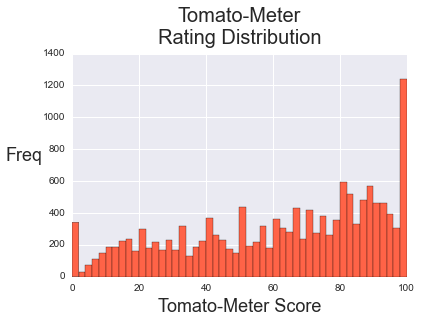

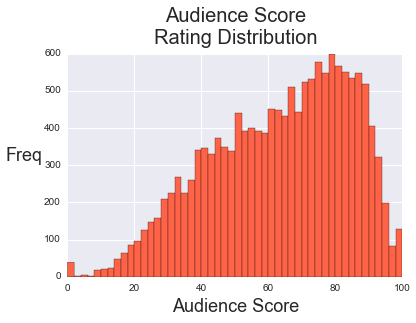

In [175]:
sns.set_style("darkgrid")

bigbadpanda['Tomato-meter'].hist(bins = 50, color = "tomato")
plt.title("Tomato-Meter\nRating Distribution", fontsize = 20, y= 1.02)
plt.xlabel("Tomato-Meter Score", fontsize = 18)
plt.ylabel("Freq", fontsize = 18, labelpad = 20).set_rotation(0)
# plt.savefig("Tom_Ratings_Histogram.png")
plt.show()

bigbadpanda['Audience Score'].hist(bins = 50, color = 'tomato')
plt.title("Audience Score\nRating Distribution", fontsize = 20, y=1.02)
plt.xlabel("Audience Score", fontsize = 18)
plt.ylabel("Freq", fontsize = 18, labelpad = 20).set_rotation(0)
# plt.savefig("Aud_Ratings_Histogram.png")
plt.show()

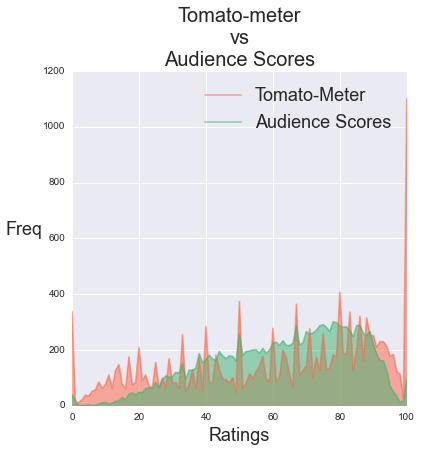

In [157]:
#Show the TM vs AS distribution via unstacked area charts.

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)

dfTom = bigbadpanda.groupby('Tomato-meter').size()
dfTom.plot(kind = "area", ax=ax, stacked = False, label="Tomato-Meter", color = "tomato")

dfAud = bigbadpanda.groupby('Audience Score').size()
dfAud.plot(kind = "area", ax=ax, stacked = False, label="Audience Scores", color = "mediumseagreen")

ax.set_xlabel("Ratings", fontsize = 18)
ax.set_ylabel("Freq", fontsize = 18, labelpad = 20).set_rotation(0)
ax.set_title("Tomato-meter\nvs\nAudience Scores", fontsize = 20)
ax.legend(fontsize = 18)

plt.savefig("TomAud_Stacked_Distrib.png")

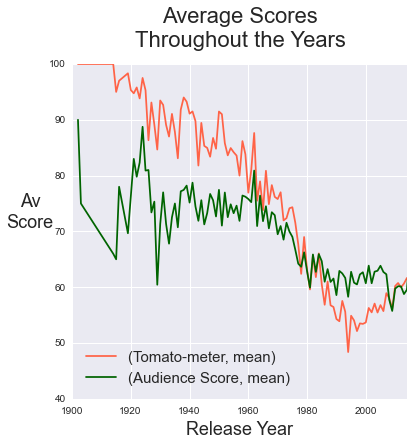

In [161]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)

average_tm = bigbadpanda.groupby(['Year']).agg({'Tomato-meter':[np.mean]})
average_tm.plot(ax=ax, legend=None, label = "Tomato-meter", color = "tomato")

average_as = bigbadpanda.groupby(['Year']).agg({'Audience Score':[np.mean]})
average_as.plot(ax=ax, legend=None, label = "Audience Score", color = "darkgreen")

ax.set_ylabel("Av\nScore", fontsize = 18, labelpad = 20).set_rotation(0)
ax.set_xlabel("Release Year", fontsize = 18)
ax.set_xlim(1900, 2014)
ax.set_title("Average Scores\nThroughout the Years", fontsize = 22, y= 1.04)
ax.legend(fontsize = 15, loc = 'lower left')

plt.savefig("Ratings_Through_Years.png")

In [7]:
bigbadpanda['Genres'] = bigbadpanda['Genres'].apply(tuple)
bigbadpanda['Actors'] = bigbadpanda['Actors'].apply(tuple)

# bigbadpanda.groupby(['Genres']).groups

print bigbadpanda.head()

                                              Actors  Audience Score  \
0  ( William Powell,  Myrna Loy,  Maureen O'Sulli...              94   
1  ( Jake T. Austin,  Raven,  Whoopi Goldberg,  R...              45   
2  ( Elina Löwensohn,  Olivier Gourmet,  Jonathan...              61   
3  ( Matti Pellonpää,  Kari Väänänen,  Jim Jarmus...              86   
4  ( Juliette Binoche,  Nikolaj Coster-Walda..., ...              65   

                Director                                             Genres  \
0          W.S. Van Dyke             (Mystery & Suspense, Classics, Comedy)   
1      Christopher Reeve  (Action & Adventure, Animation, Kids & Family,...   
2         Abdel Kechiche                 (Art House & International, Drama)   
3         Aki Kaurismäki  (Drama, Action & Adventure, Musical & Performi...   
4  Nikolaj Coster-Waldau                                           (Drama,)   

                           Movie Title  Tomato-meter  Year  
0                  The Thin Man

In [8]:
bigbadpanda['Rating Diff'] = bigbadpanda['Tomato-meter'] - bigbadpanda['Audience Score']
print bigbadpanda.sort(['Rating Diff'], ascending = False).head()

                                                  Actors  Audience Score  \
245                       ( James Ellroy,  Phil Tintner)               0   
13808  ( John Fahey,  Melody Fahey,  Terry Robb,  Pet...               0   
10700  ( Ranveer Singh,  Arjun Kapoor,  Irfan Khan,  ...               8   
3985   ( Moon Ye-Won,  Bong-Nam Park,  Lorne Oliver, ...               0   
9942   ( Cynthia Rothrock,  Seamus Dever,  Dan Lauria...               0   

               Director                                             Genres  \
245        Reinhard Jud                    (Documentary, Special Interest)   
13808  James Cullingham           (Musical & Performing Arts, Documentary)   
10700   Ali Abbas Zafar  (Drama, Action & Adventure, Romance, Art House...   
3985      Bong-Nam Park  (Documentary, Art House & International, Speci...   
9942      Jorge Montesi                   (Action & Adventure, Television)   

                                             Movie Title  Tomato-meter  Ye

In [16]:
bigbadpanda.to_csv("bigbadpanda.csv", sep='\t')
print 'Done here.'

Done here.


In [9]:
len(bigbadpanda)

15032

In [10]:
newpanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score', 'Director', 'Year', 'Movie Title']]

In [11]:
unpack_tuples_newpanda = newpanda.join(newpanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_newpanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score               Director  Year  \
0              94          W.S. Van Dyke  1934   
1              45      Christopher Reeve  2006   
2              61         Abdel Kechiche  2011   
3              86         Aki Kaurismäki  1989   
4              65  Nikolaj Coster-Waldau  2014   

                           Movie Title                          0  \
0                  The Thin Man (1934)         Mystery & Suspense   
1               Everyone's Hero (2006)         Action & Adventure   
2     Black Venus (Venus Noire) (2011)  Art House & International   
3 

In [12]:
dummy_cols_diff_newpanda = unpack_tuples_newpanda.columns.difference(unpack_tuples_newpanda[['Genres', 'Tomato-meter', 
                                                                        'Audience Score', 'Year', 'Director', 'Movie Title']].columns)
print dummy_cols_diff_newpanda

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [13]:
got_dummies_diff_newpanda = pd.get_dummies(unpack_tuples_newpanda[dummy_cols_diff_newpanda | pd.Index(['Audience Score', 'Tomato-meter', 'Year', 'Director', 'Movie Title'])], columns = dummy_cols_diff_newpanda) 
print got_dummies_diff_newpanda.head()

   Audience Score               Director                          Movie Title  \
0              94          W.S. Van Dyke                  The Thin Man (1934)   
1              45      Christopher Reeve               Everyone's Hero (2006)   
2              61         Abdel Kechiche     Black Venus (Venus Noire) (2011)   
3              86         Aki Kaurismäki  Leningrad Cowboys Go America (1989)   
4              65  Nikolaj Coster-Waldau        1,000 Times Good Night (2014)   

   Tomato-meter  Year  0_Action & Adventure  0_Animation  \
0            97  1934                     0            0   
1            41  2006                     1            0   
2           100  2011                     0            0   
3           100  1989                     0            0   
4            74  2014                     0            0   

   0_Art House & International  0_Classics  0_Comedy  \
0                            0           0         0   
1                            0          

In [14]:
melted_newpanda = pd.melt(got_dummies_diff_newpanda, value_vars=got_dummies_diff_newpanda.columns.difference
                          (['Audience Score', 'Tomato-meter', 'Year', 'Director', 'Movie Title']).tolist(),
                          id_vars=['Audience Score', 'Tomato-meter', 'Year', 'Director', 'Movie Title'])
print melted_newpanda.head()

   Audience Score  Tomato-meter  Year               Director  \
0              94            97  1934          W.S. Van Dyke   
1              45            41  2006      Christopher Reeve   
2              61           100  2011         Abdel Kechiche   
3              86           100  1989         Aki Kaurismäki   
4              65            74  2014  Nikolaj Coster-Waldau   

                           Movie Title              variable  value  
0                  The Thin Man (1934)  0_Action & Adventure      0  
1               Everyone's Hero (2006)  0_Action & Adventure      1  
2     Black Venus (Venus Noire) (2011)  0_Action & Adventure      0  
3  Leningrad Cowboys Go America (1989)  0_Action & Adventure      0  
4        1,000 Times Good Night (2014)  0_Action & Adventure      0  


In [15]:
melted_newpanda['variable'] = melted_newpanda.variable.str.replace(r'\d_', '')
print melted_newpanda.head()

   Audience Score  Tomato-meter  Year               Director  \
0              94            97  1934          W.S. Van Dyke   
1              45            41  2006      Christopher Reeve   
2              61           100  2011         Abdel Kechiche   
3              86           100  1989         Aki Kaurismäki   
4              65            74  2014  Nikolaj Coster-Waldau   

                           Movie Title            variable  value  
0                  The Thin Man (1934)  Action & Adventure      0  
1               Everyone's Hero (2006)  Action & Adventure      1  
2     Black Venus (Venus Noire) (2011)  Action & Adventure      0  
3  Leningrad Cowboys Go America (1989)  Action & Adventure      0  
4        1,000 Times Good Night (2014)  Action & Adventure      0  


In [16]:
melted_newpanda = melted_newpanda.rename(columns={'variable':'Genre'})

In [17]:
scores_year_genre_dir = melted_newpanda[melted_newpanda.value != 0][['Audience Score', 'Tomato-meter',
                                                                     'Year', 'Genre', 'Director', 'Movie Title']]

In [18]:
scores_year_genre_dir['Rating Difference'] = scores_year_genre_dir['Tomato-meter']\
                                            - scores_year_genre_dir['Audience Score']

In [19]:
scores_year_genre_dir.to_csv("scores_year_genre_dir.csv", sep='\t')
print 'Done here.'

Done here.


In [20]:
print scores_year_genre_dir[scores_year_genre_dir['Movie Title'] == "The Thin Man (1934)"]

        Audience Score  Tomato-meter  Year               Genre       Director  \
180384              94            97  1934  Mystery & Suspense  W.S. Van Dyke   
360768              94            97  1934            Classics  W.S. Van Dyke   
706504              94            97  1934              Comedy  W.S. Van Dyke   

                Movie Title  Rating Difference  
180384  The Thin Man (1934)                  3  
360768  The Thin Man (1934)                  3  
706504  The Thin Man (1934)                  3  


In [21]:
scores_year_genre_dir.shape

(35283, 7)

In [22]:
genrepanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score']]
print genrepanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  
0              94  
1              45  
2              61  
3              86  
4              65  


In [23]:
unpack_tuples_df = genrepanda.join(genrepanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score                          0                   1  \
0              94         Mystery & Suspense            Classics   
1              45         Action & Adventure           Animation   
2              61  Art House & International               Drama   
3              86                      Drama  Action & Adventure   
4              65                      Drama                 NaN   

                           2                          3       4    5    6    7  
0                     Comedy                        NaN     NaN  NaN  NaN  NaN  
1       

In [24]:
dummy_cols = unpack_tuples_df.columns.difference(unpack_tuples_df[['Genres', 'Tomato-meter', 'Audience Score']].columns)
print 'Done here.'

Done here.


In [25]:
got_dummies_df = pd.get_dummies(unpack_tuples_df[dummy_cols | pd.Index(['Audience Score', 'Tomato-meter'])]) 
print got_dummies_df.head()

   Audience Score  Tomato-meter  0_Action & Adventure  0_Animation  \
0              94            97                     0            0   
1              45            41                     1            0   
2              61           100                     0            0   
3              86           100                     0            0   
4              65            74                     0            0   

   0_Art House & International  0_Classics  0_Comedy  0_Documentary  0_Drama  \
0                            0           0         0              0        0   
1                            0           0         0              0        0   
2                            1           0         0              0        0   
3                            0           0         0              0        1   
4                            0           0         0              0        1   

   0_Faith & Spirituality             ...               4_Sports & Fitness  \
0                   

In [26]:
melted_df = pd.melt(got_dummies_df, value_vars=got_dummies_df.columns.difference(['Audience Score', 'Tomato-meter']).tolist(), id_vars=['Audience Score', 'Tomato-meter'])
print melted_df.head()

   Audience Score  Tomato-meter              variable  value
0              94            97  0_Action & Adventure      0
1              45            41  0_Action & Adventure      1
2              61           100  0_Action & Adventure      0
3              86           100  0_Action & Adventure      0
4              65            74  0_Action & Adventure      0


In [27]:
print melted_df.head()

   Audience Score  Tomato-meter              variable  value
0              94            97  0_Action & Adventure      0
1              45            41  0_Action & Adventure      1
2              61           100  0_Action & Adventure      0
3              86           100  0_Action & Adventure      0
4              65            74  0_Action & Adventure      0


In [28]:
melted_df['variable'] = melted_df.variable.str.replace(r'\d_', '')
print melted_df.head()

   Audience Score  Tomato-meter            variable  value
0              94            97  Action & Adventure      0
1              45            41  Action & Adventure      1
2              61           100  Action & Adventure      0
3              86           100  Action & Adventure      0
4              65            74  Action & Adventure      0


In [31]:
grouped_genres_series = melted_df[melted_df.value != 0].groupby('variable')['value'].sum()
print grouped_genres_series

variable
Action & Adventure           2824
Adult                           3
Animation                     473
Anime & Manga                  22
Art House & International    2903
Classics                     1490
Comedy                       5240
Cult Movies                   101
Documentary                  1785
Drama                        8605
Faith & Spirituality           92
Gay & Lesbian                  78
Horror                       1520
Kids & Family                 934
Musical & Performing Arts     994
Mystery & Suspense           2811
Romance                      1769
Science Fiction & Fantasy    1548
Special Interest             1395
Sports & Fitness              167
Television                    308
Western                       221
Name: value, dtype: float64


In [32]:
ordered_genre_counts_series = grouped_genres_series.order(ascending = True)
print ordered_genre_counts_series.head()

variable
Adult                     3
Anime & Manga            22
Gay & Lesbian            78
Faith & Spirituality     92
Cult Movies             101
Name: value, dtype: float64


In [33]:
print "Genres are listed", grouped_genres_series.sum(), "times.", '\n' 

print "There are", len(bigbadpanda), "total unique movies on RottenTomatoes.", '\n' 

print "So, your average Rotten Tomato movie is characterized under", (grouped_genres_series.sum()) / len(bigbadpanda), "genres.", '\n' 

# (grouped_genres_series.sum()) / len(bigbadpanda)

Genres are listed 35283.0 times. 

There are 15032 total unique movies on RottenTomatoes. 

So, your average Rotten Tomato movie is characterized under 2.34719265567 genres. 



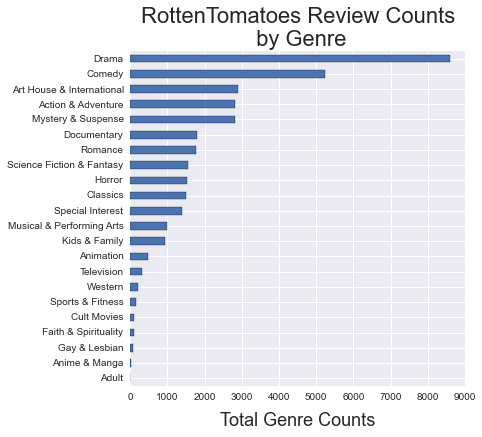

In [37]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ordered_genre_counts_series.plot(kind="barh")
ax.set_ylabel("")
ax.set_xlabel("Total Genre Counts", fontsize = 18, labelpad = 10)
ax.set_title("RottenTomatoes Review Counts\n by Genre", fontsize = 22)



In [38]:
#The 'Rating Difference' column is the how much greater or less the critics' tomato score was
#than the everyman's audience score for the movie.

genrepanda['Rating Difference'] = genrepanda['Tomato-meter'] - genrepanda['Audience Score']
print genrepanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Rating Difference  
0              94                  3  
1              45                 -4  
2              61                 39  
3              86                 14  
4              65                  9  


/Users/yongcho822/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
unpack_tuples_df = genrepanda.join(genrepanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Rating Difference                          0  \
0              94                  3         Mystery & Suspense   
1              45                 -4         Action & Adventure   
2              61                 39  Art House & International   
3              86                 14                      Drama   
4              65                  9                      Drama   

                    1                          2                          3  \
0            Classics                     Comedy                        NaN   
1           Animat

In [40]:
dummy_cols_diff = unpack_tuples_df.columns.difference(unpack_tuples_df[['Genres', 'Tomato-meter', 'Audience Score', 'Rating Difference']].columns)

In [41]:
got_dummies_df_diff = pd.get_dummies(unpack_tuples_df[dummy_cols_diff | pd.Index(['Audience Score', 'Tomato-meter', 'Rating Difference'])])

In [42]:
melted_df_diff = pd.melt(got_dummies_df_diff, value_vars=got_dummies_df_diff.columns.difference(['Audience Score', 'Tomato-meter', "Rating Difference"]).tolist(), id_vars=['Audience Score', 'Tomato-meter', 'Rating Difference'])

In [43]:
melted_df_diff['variable'] = melted_df_diff.variable.str.replace(r'\d_', '')
print melted_df_diff.shape

(1533264, 5)


In [44]:
print melted_df_diff[melted_df_diff.value != 0].head()

    Audience Score  Tomato-meter  Rating Difference            variable  value
1               45            41                 -4  Action & Adventure      1
9               44            53                  9  Action & Adventure      1
13              61            75                 14  Action & Adventure      1
18              50             8                -42  Action & Adventure      1
25              80            62                -18  Action & Adventure      1


In [45]:
just_diff_and_genre_df = melted_df_diff[melted_df_diff.value != 0][['Rating Difference', 'variable']]

In [46]:
print just_diff_and_genre_df.head()

print type(just_diff_and_genre_df)

    Rating Difference            variable
1                  -4  Action & Adventure
9                   9  Action & Adventure
13                 14  Action & Adventure
18                -42  Action & Adventure
25                -18  Action & Adventure
<class 'pandas.core.frame.DataFrame'>


In [47]:
grouped_genres_series_diff = melted_df_diff[melted_df_diff.value != 0].groupby('variable')

In [48]:
grouped_genres_series_diff['Rating Difference'].describe()

variable                 
Action & Adventure  count    2824.000000
                    mean       -4.844193
                    std        21.082983
                    min       -80.000000
                    25%       -19.000000
                    50%        -3.000000
                    75%         9.000000
                    max        92.000000
Adult               count       3.000000
                    mean        1.666667
                    std         6.506407
                    min        -5.000000
                    25%        -1.500000
                    50%         2.000000
                    75%         5.000000
                    max         8.000000
Animation           count     473.000000
                    mean       -3.699789
                    std        19.034390
                    min       -64.000000
                    25%       -15.000000
                    50%        -1.000000
                    75%         9.000000
                    max        

In [49]:
sort_for_seaborn = just_diff_and_genre_df.sort(["Rating Difference"], ascending = False)
sort_for_seaborn.head()

,Rating Difference,variable
419672,100,Documentary
179160,100,Musical & Performing Arts
75405,100,Documentary
556429,100,Special Interest
296308,92,Action & Adventure


In [50]:
sort_for_seaborn.variable.nunique()

22

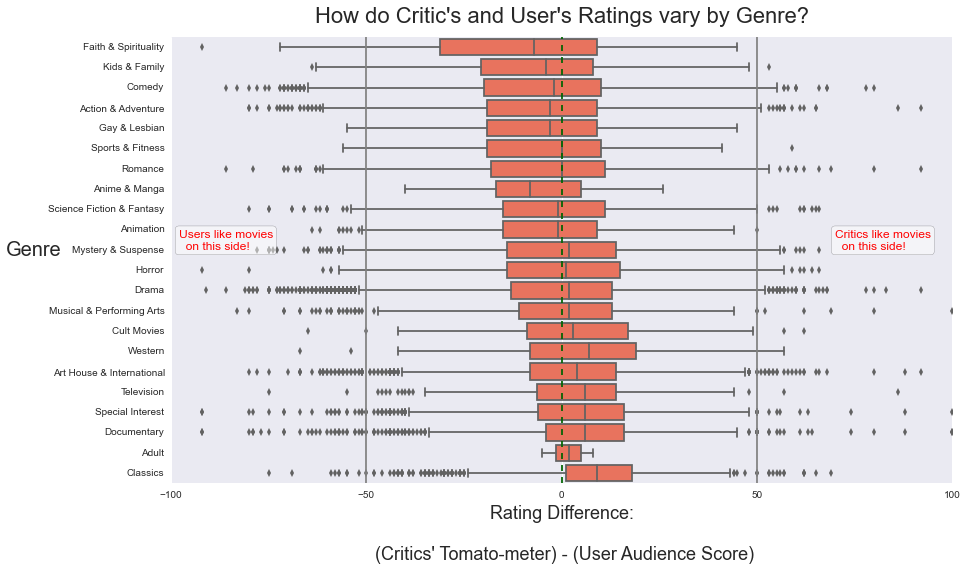

In [51]:
#seaborn stripplot: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html#seaborn.stripplot

sns.set_style("darkgrid")

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x=just_diff_and_genre_df["Rating Difference"], y=just_diff_and_genre_df.variable, order = ['Faith & Spirituality', 'Kids & Family', 'Comedy', 'Action & Adventure', 'Gay & Lesbian', 'Sports & Fitness',
         'Romance','Anime & Manga','Science Fiction & Fantasy','Animation','Mystery & Suspense','Horror', 'Drama', 
         'Musical & Performing Arts', 'Cult Movies', 'Western','Art House & International', 'Television', 
         'Special Interest', 'Documentary', 'Adult', 'Classics'], color = 'tomato')


ax.set_xlabel("Rating Difference: \n \n (Critics' Tomato-meter) - (User Audience Score)", fontsize = 18)
h = ax.set_ylabel("Genre", fontsize = 20, labelpad = 14)
h.set_rotation(0)
ax.set_xlim(-100,100)
ax.axvline(x=0, color = 'darkgreen', ls = "--")
ax.axvline(x=50, color = 'grey')
ax.axvline(x=-50, color = 'grey')
plt.title("How do Critic's and User's Ratings vary by Genre?", fontsize = 22, y=1.02)

textstr = ('Users like movies\n  on this side!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(-98, 9, textstr, fontsize=12,
        verticalalignment='top', color="red", bbox=props)

textstr = ('Critics like movies\n  on this side!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(70, 9, textstr, fontsize=12,
        verticalalignment='top', color="red", bbox=props)

# plt.savefig("Genre_Boxplot_Seaborn.png")

In [52]:
model_df = melted_df_diff[melted_df_diff.value != 0][["Audience Score", "Tomato-meter", "variable"]]
print model_df.head()

    Audience Score  Tomato-meter            variable
1               45            41  Action & Adventure
9               44            53  Action & Adventure
13              61            75  Action & Adventure
18              50             8  Action & Adventure
25              80            62  Action & Adventure


In [53]:
model_df.to_csv("Scores_Ratings_Genres.csv", sep='\t')
print 'Done here.'

Done here.


In [56]:
mediumpanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score', 'Year']]

In [57]:
print mediumpanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Year  
0              94  1934  
1              45  2006  
2              61  2011  
3              86  1989  
4              65  2014  


In [58]:
unpack_tuples_df2 = mediumpanda.join(mediumpanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df2.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Year                          0                   1  \
0              94  1934         Mystery & Suspense            Classics   
1              45  2006         Action & Adventure           Animation   
2              61  2011  Art House & International               Drama   
3              86  1989                      Drama  Action & Adventure   
4              65  2014                      Drama                 NaN   

                           2                          3       4    5    6    7  
0                     Comedy                        N

In [59]:
dummy_cols_diff2 = unpack_tuples_df2.columns.difference(unpack_tuples_df2[['Genres', 'Tomato-meter', 
                                                                        'Audience Score', 'Year']].columns)
print dummy_cols_diff2

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [60]:
got_dummies_df_diff2 = pd.get_dummies(unpack_tuples_df2[dummy_cols_diff2 | pd.Index(['Audience Score', 'Tomato-meter', 
                                                                                   'Year'])]) 
print got_dummies_df_diff2.head()

   Audience Score  Tomato-meter  Year  0_Action & Adventure  0_Animation  \
0              94            97  1934                     0            0   
1              45            41  2006                     1            0   
2              61           100  2011                     0            0   
3              86           100  1989                     0            0   
4              65            74  2014                     0            0   

   0_Art House & International  0_Classics  0_Comedy  0_Documentary  0_Drama  \
0                            0           0         0              0        0   
1                            0           0         0              0        0   
2                            1           0         0              0        0   
3                            0           0         0              0        1   
4                            0           0         0              0        1   

              ...               4_Sports & Fitness  5_Drama  5

In [61]:
melted_df_diff2 = pd.melt(got_dummies_df_diff2, value_vars=got_dummies_df_diff2.columns.difference
                         (['Audience Score', 'Tomato-meter', "Year"]).tolist(), 
                         id_vars=['Audience Score', 'Tomato-meter', 'Year'])

In [62]:
melted_df_diff2.head()

,Audience Score,Tomato-meter,Year,variable,value
0,94,97,1934,0_Action & Adventure,0
1,45,41,2006,0_Action & Adventure,1
2,61,100,2011,0_Action & Adventure,0
3,86,100,1989,0_Action & Adventure,0
4,65,74,2014,0_Action & Adventure,0


In [63]:
melted_df_diff2['variable'] = melted_df_diff2.variable.str.replace(r'\d_', '')
print melted_df_diff2.shape

(1533264, 5)


In [64]:
scores_year_genre = melted_df_diff2[melted_df_diff2.value != 0][['Audience Score', 'Tomato-meter',
                                                                     'Year', 'variable']]

In [65]:
scores_year_genre.to_csv("scores_year_genre.csv", sep='\t')
print 'Done here.'

Done here.


In [66]:
scores_year_genre.shape

(35283, 4)

In [ ]:
# director_counts = bigbadpanda.groupby(["Director"])
# director_counts_over_10 = director_counts.filter(lambda x: len(x) > 10)
# print type(director_counts_over_10), '\n'
# print director_counts_over_10.groupby(["Director"]).size()

In [67]:
print bigbadpanda.groupby(["Director"])['Rating Diff'].mean().order()

Director
R Torjan               -92
Andrew Marcus          -92
Shundell Prasad        -91
Ian Thorpe             -83
Steven Goldmann        -81
Salomé Breziner        -80
R. J. Kizer            -80
Briggite Cornand       -80
Raj Amit Kumar         -79
Sylvie Verheyde        -79
Andy Humphries (II)    -78
John Sullivan          -77
Brendan Malloy         -76
Rachel Goldenberg      -75
Gordon Flemyng         -75
Tim Watkins            -75
Mick Davis             -75
Hype Williams          -75
Robert Mickels         -75
Rachel Davis           -75
Eric Chaney            -73
Abdul Malik Abbott     -73
Cess Silvera           -72
Casey La Scala         -71
Scott Cervine          -71
Andrea Weiss           -71
Ed Bye                 -71
Rik Swartzwelder       -70
Darrel Campbell        -70
Adam Deacon            -70
                      ... 
Rowland V. Lee          56
Aleksey Balabanov       57
Zev Berman              57
Dena Seidel             57
Joseph Travolta         57
Dwain Esper        

In [68]:
print bigbadpanda.groupby(["Director"]).size().count()

7496


In [69]:
#seeing summary count of movies per director

print bigbadpanda.groupby(["Director"]).size().value_counts()

1     5094
2     1096
3      417
4      251
5      164
6      114
7       79
8       55
9       51
10      36
11      26
13      19
14      16
12      15
16      10
15      10
18       8
17       7
19       5
21       5
20       3
23       3
22       3
24       2
29       2
25       2
32       1
44       1
38       1
dtype: int64


In [70]:
# Grouping by Directors with more than 10 movies.

director_counts = bigbadpanda.groupby(["Director"])
director_counts_over_10 = director_counts.filter(lambda x: len(x) > 10)
print type(director_counts_over_10), '\n'
print director_counts_over_10.groupby(["Director"]).size()
# 139 Directors have directed more than 10 films

<class 'pandas.core.frame.DataFrame'> 

Director
Abel Ferrara            16
Akira Kurosawa          18
Alan J. Pakula          11
Alan Parker             14
Alex Gibney             11
Alfred Hitchcock        38
Ang Lee                 11
Anthony Mann            14
Arthur Hiller           16
Barry Levinson          21
Bernardo Bertolucci     12
Billy Wilder            23
Blake Edwards           21
Brian DePalma           13
Bruce Beresford         17
Carl Reiner             13
Chris Columbus          13
Clint Eastwood          32
Dario Argento           15
David Cronenberg        18
David Lean              11
Dennis Dugan            12
Don Siegel              11
Elia Kazan              12
Eric Rohmer             13
Federico Fellini        15
Francis Ford Coppola    22
Frank Capra             11
François Ozon           15
François Truffaut       17
                        ..
Roger Corman            11
Roger Donaldson         14
Roger Spottiswoode      12
Roman Polanski          16
Ron Ho

In [71]:
director_tomatoes = director_counts_over_10.groupby(["Director"]).agg({'Tomato-meter':[np.mean]})["Tomato-meter"]["mean"].order(ascending = False)
print director_tomatoes.head()

Director
Luis Buñuel       94.923077
William Wyler     93.947368
Frank Capra       92.909091
Anthony Mann      92.785714
Hayao Miyazaki    92.363636
Name: mean, dtype: float64


In [72]:
director_audience = director_counts_over_10.groupby(["Director"]).agg({'Audience Score':[np.mean]})["Audience Score"]["mean"].order(ascending = False)
print director_audience.head()

Director
Hayao Miyazaki      90.090909
Akira Kurosawa      85.944444
William Wyler       85.789474
Federico Fellini    84.000000
David Lean          83.636364
Name: mean, dtype: float64


In [73]:
director_combined_ratings = pd.concat([director_tomatoes, director_audience], axis = 1)
director_combined_ratings.columns = ['Av Tomato-meter','Av Audience Score']
director_combined_ratings['Combined Score'] = director_combined_ratings['Av Tomato-meter'] + director_combined_ratings['Av Audience Score']
director_combined_ratings['Rating Diff'] = director_combined_ratings['Av Tomato-meter'] - director_combined_ratings['Av Audience Score']
#Combined Score and Diff are based on average Tom meter and Audience Rating
print director_combined_ratings[director_combined_ratings.index == 'Judd Apatow']

Empty DataFrame
Columns: [Av Tomato-meter, Av Audience Score, Combined Score, Rating Diff]
Index: []


In [74]:
print director_combined_ratings['Av Tomato-meter'].order()[80:]

Woody Allen                 73.227273
Martin Ritt                 73.461538
Michel Gondry               73.636364
Sam Raimi                   73.642857
Mike Nichols                73.714286
David Cronenberg            74.000000
Steven Soderbergh           74.521739
Tim Burton                  74.666667
Jim Jarmusch                75.454545
Yimou Zhang                 75.545455
François Ozon               76.400000
Peter Jackson               76.538462
Jean-Luc Godard             76.818182
Roman Polanski              77.000000
Robert Aldrich              77.750000
Robert Altman               77.916667
Stephen Frears              78.000000
Steven Spielberg            78.206897
Nicholas Ray                79.083333
John Sayles                 80.200000
Louis Malle                 80.363636
Ang Lee                     80.636364
Jonathan Demme              80.944444
Pedro Almodóvar             81.133333
Peter Weir                  81.461538
John Sturges                81.750000
Richard Link

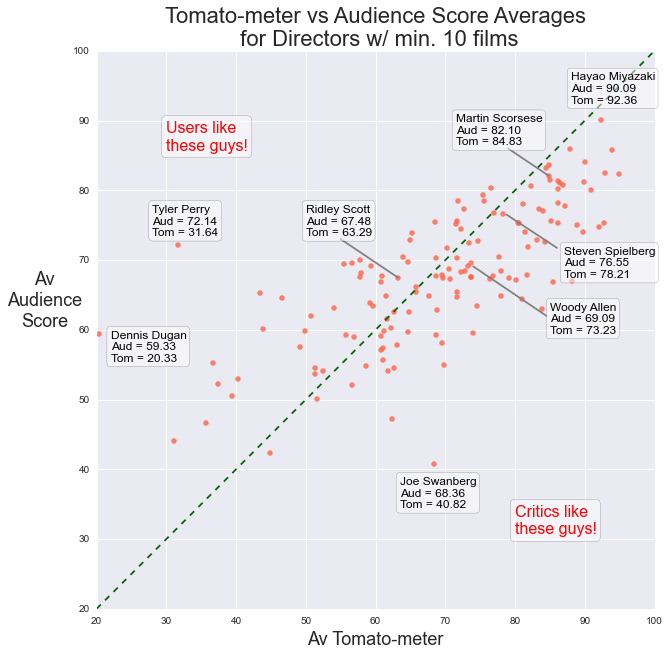

In [75]:
# ax = sns.jointplot(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings, stat_func = None, 
#                    size = 8, xlim=(0,100), ylim=(0,100))
# ax.plot(100, 100)
# ax.title = "Average Tomato-meter vs Audience Score for Directors with over 10 Movies"

# g = sns.JointGrid(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings,
#                   xlim=(20,100), ylim=(20,100), size = 8)
# g = g.plot_joint(plt.scatter,color="r", s=25, edgecolor="white")
# g = g.plot_marginals(sns.distplot, kde=False, color="r")
# g = g.plot([20,100], [20,100])

plt.figure(figsize=(10, 10))
plt.title("Tomato-meter vs Audience Score Averages\n for Directors w/ min. 10 films", fontsize = 22)

ax = sns.regplot(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings, fit_reg = False, 
                 scatter_kws={'s':30}, color = 'tomato')
ax.set_xlim(20,100)
ax.set_ylim(20,100)
ax.plot([20,100], [20,100], ls = "--", c= 'darkgreen')

ax.set_xlabel("Av Tomato-meter", fontsize = 18)
ax.set_ylabel("Av\nAudience\nScore", fontsize = 18, labelpad = 30).set_rotation(0)

textstr = ('Tyler Perry' '\n' 'Aud = 72.14''\n' 'Tom = 31.64')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(28, 78, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Joe Swanberg' '\n' 'Aud = 68.36''\n' 'Tom = 40.82')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(63.5, 39, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Dennis Dugan' '\n' 'Aud = 59.33''\n' 'Tom = 20.33')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(22, 60, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Hayao Miyazaki' '\n' 'Aud = 90.09''\n' 'Tom = 92.36')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(88, 97, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Martin Scorsese' '\n' 'Aud = 82.10''\n' 'Tom = 84.83')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(71.5, 91, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([79,84.8], [86,82.1], ls = "-", c= 'grey')

textstr = ('Ridley Scott' '\n' 'Aud = 67.48''\n' 'Tom = 63.29')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(50, 78, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([55,63.2], [73,67.5], ls = "-", c= 'grey')

textstr = ('Steven Spielberg' '\n' 'Aud = 76.55''\n' 'Tom = 78.21')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(87, 72, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([78.8,86], [76.5,71.75], ls = "-", c= 'grey')

textstr = ('Woody Allen' '\n' 'Aud = 69.09''\n' 'Tom = 73.23')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(85, 64, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([74,84.5], [69.09,62], ls = "-", c= 'grey')

textstr = ('Critics like' '\n' 'these guys!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(80, 35, textstr, fontsize=16,
        verticalalignment='top', color="red", bbox=props)

textstr = ('Users like' '\n' 'these guys!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(30, 90, textstr, fontsize=16,
        verticalalignment='top', color="red", bbox=props)

plt.savefig("Directors_Scatterplot")

In [76]:
director_list = []

dir_rating_diff = director_combined_ratings.sort(['Rating Diff'])["Rating Diff"]

for i in dir_rating_diff:    
    if abs(i) >= 15:
        director_list.extend(director_combined_ratings[('Rating Diff')][director_combined_ratings[('Rating Diff')] 
                                           == i].index.tolist())

print director_list

['Tyler Perry', 'Dennis Dugan', 'Luc Besson', 'Garry Marshall', 'John G. Avildsen', 'Joel Schumacher', 'Abel Ferrara', 'George Cukor', 'Jonathan Demme', 'Don Siegel', 'Anthony Mann', 'Michael Curtiz', 'Alfred Hitchcock', 'Robert Stevenson', 'Joe Swanberg']


In [77]:
#We now have identified the 35 directors we want to include in our model

#don't run this box again


dir_combined_sort = director_combined_ratings.sort(['Combined Score'])['Combined Score']
director_list.extend(list(dir_combined_sort.head(10).index))
director_list.extend(list(dir_combined_sort.tail(10).index))

print director_list

['Tyler Perry', 'Dennis Dugan', 'Luc Besson', 'Garry Marshall', 'John G. Avildsen', 'Joel Schumacher', 'Abel Ferrara', 'George Cukor', 'Jonathan Demme', 'Don Siegel', 'Anthony Mann', 'Michael Curtiz', 'Alfred Hitchcock', 'Robert Stevenson', 'Joe Swanberg', 'Steve Miner', 'Dennis Dugan', 'Renny Harlin', 'Peter Hyams', 'Simon Wincer', 'Stephen Herek', 'Garry Marshall', 'J. Lee Thompson', 'Wes Craven', 'Tyler Perry', 'Anthony Mann', 'David Lean', 'Eric Rohmer', 'Billy Wilder', 'Akira Kurosawa', 'Federico Fellini', 'Frank Capra', 'Luis Bu\xc3\xb1uel', 'William Wyler', 'Hayao Miyazaki']


In [78]:
director_set = set(director_list)

In [79]:
len(director_set)

31

In [80]:
yongpanda = bigbadpanda.copy(deep=True)
print yongpanda.head()

                                              Actors  Audience Score  \
0  ( William Powell,  Myrna Loy,  Maureen O'Sulli...              94   
1  ( Jake T. Austin,  Raven,  Whoopi Goldberg,  R...              45   
2  ( Elina Löwensohn,  Olivier Gourmet,  Jonathan...              61   
3  ( Matti Pellonpää,  Kari Väänänen,  Jim Jarmus...              86   
4  ( Juliette Binoche,  Nikolaj Coster-Walda..., ...              65   

                Director                                             Genres  \
0          W.S. Van Dyke             (Mystery & Suspense, Classics, Comedy)   
1      Christopher Reeve  (Action & Adventure, Animation, Kids & Family,...   
2         Abdel Kechiche                 (Art House & International, Drama)   
3         Aki Kaurismäki  (Drama, Action & Adventure, Musical & Performi...   
4  Nikolaj Coster-Waldau                                           (Drama,)   

                           Movie Title  Tomato-meter  Year  Rating Diff  
0                 

In [81]:
yongpanda['Select Directors'] = yongpanda['Director']

def directorfilter(director):
    if director not in director_set:
        return "Empty"
    else:
        return director

# print yongpanda['Select Directors'].apply(directorfilter).nunique()

yongpanda['Select Directors'] = yongpanda['Select Directors'].apply(directorfilter)

In [82]:
print yongpanda['Select Directors'].head()

0    Empty
1    Empty
2    Empty
3    Empty
4    Empty
Name: Select Directors, dtype: object


In [83]:
from patsy import dmatrices

In [84]:
y, X = dmatrices('Q("Audience Score") ~ Q("Select Directors")', data=yongpanda, return_type='dataframe')

In [85]:
X.drop(X.columns[[0]], axis = 1, inplace = True)

In [86]:
X.drop(X.columns[[7]], axis = 1, inplace = True)

In [99]:
emilypanda = bigbadpanda.copy(deep=True)
emilypanda['Genres'] = emilypanda['Genres'].map(lambda x: '_'.join(x))
genres = emilypanda['Genres'].str.get_dummies(sep='_')
emilypanda_genre = emilypanda.join(genres)
emilypanda_genre.insert(0, "Intercept", 1)

In [100]:
emily = emilypanda_genre.copy(deep=True)
emily.drop(emily.columns[[1, 3, 4, 5]], axis = 1, inplace = True)
emily.drop(emily.columns[[4]], axis = 1, inplace = True)

In [104]:
emily_y = emily["Audience Score"]
print len(emily_y)

15032


In [106]:
emily.drop(emily.columns[[1]], axis = 1, inplace = True)

In [107]:
print emily.head()

   Intercept  Tomato-meter  Year  Action & Adventure  Adult  Animation  \
0          1            97  1934                   0      0          0   
1          1            41  2006                   1      0          1   
2          1           100  2011                   0      0          0   
3          1           100  1989                   1      0          0   
4          1            74  2014                   0      0          0   

   Anime & Manga  Art House & International  Classics  Comedy   ...     \
0              0                          0         1       1   ...      
1              0                          0         0       1   ...      
2              0                          1         0       0   ...      
3              0                          1         0       1   ...      
4              0                          0         0       0   ...      

   Horror  Kids & Family  Musical & Performing Arts  Mystery & Suspense  \
0       0              0           

In [108]:
emilycopy = emily.copy(deep=True)
print emilycopy.head()

   Intercept  Tomato-meter  Year  Action & Adventure  Adult  Animation  \
0          1            97  1934                   0      0          0   
1          1            41  2006                   1      0          1   
2          1           100  2011                   0      0          0   
3          1           100  1989                   1      0          0   
4          1            74  2014                   0      0          0   

   Anime & Manga  Art House & International  Classics  Comedy   ...     \
0              0                          0         1       1   ...      
1              0                          0         0       1   ...      
2              0                          1         0       0   ...      
3              0                          1         0       1   ...      
4              0                          0         0       0   ...      

   Horror  Kids & Family  Musical & Performing Arts  Mystery & Suspense  \
0       0              0           

In [109]:
newemily = emilycopy.join(X)

In [110]:
print newemily.head()

   Intercept  Tomato-meter  Year  Action & Adventure  Adult  Animation  \
0          1            97  1934                   0      0          0   
1          1            41  2006                   1      0          1   
2          1           100  2011                   0      0          0   
3          1           100  1989                   1      0          0   
4          1            74  2014                   0      0          0   

   Anime & Manga  Art House & International  Classics  Comedy  \
0              0                          0         1       1   
1              0                          0         0       1   
2              0                          1         0       0   
3              0                          1         0       1   
4              0                          0         0       0   

                    ...                    \
0                   ...                     
1                   ...                     
2                   ...      

In [111]:
newemily.shape

(15032, 55)

In [112]:
emily_y.shape

(15032,)

In [113]:
newemily.to_csv("XDesignMatrix_w_Genre_Year_Director_Tom", sep='\t')
print 'Done here.'

Done here.


In [116]:
newemily_model = sm.OLS(emily_y, newemily)
newemily_results = newemily_model.fit()

In [117]:
print newemily_results.summary()

                            OLS Regression Results                            
Dep. Variable:         Audience Score   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     259.8
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        13:25:51   Log-Likelihood:                -61854.
No. Observations:               15032   AIC:                         1.238e+05
Df Residuals:                   14977   BIC:                         1.242e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------

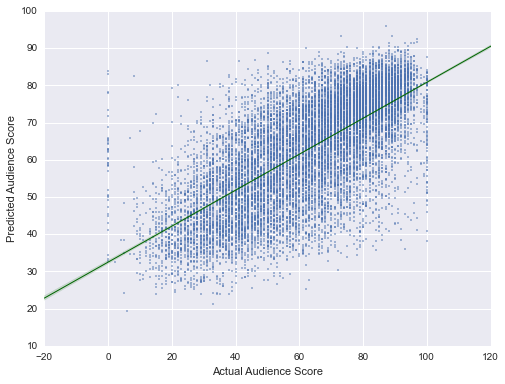

In [118]:
#ON TOTAL SET, NOT SPLIT INTO TEST AND TRAIN - BUT WITH DIRECTOR ADDED TO GENRE AND ALL.

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

thedamnthing = pd.DataFrame(zip(emily_y, newemily_results.predict()),
                               columns = ['Actual Audience Score', 'Predicted Audience Score'])

sns.regplot(x='Actual Audience Score', y='Predicted Audience Score', data= thedamnthing, scatter_kws={'s':3},
            line_kws = { "color": "darkgreen", "linewidth":1}, ci = 90)

In [119]:
X.shape, y.shape

((15032, 30), (15032, 1))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(newemily, emily_y, test_size=0.25, random_state=1)

In [121]:
X_train.shape, X_test.shape

((11274, 55), (3758, 55))

In [122]:
yong_model = sm.OLS(y_train, X_train).fit()

In [123]:
y_pred = yong_model.predict(X_test)

In [125]:
print yong_model.summary()

                            OLS Regression Results                            
Dep. Variable:         Audience Score   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     196.4
Date:                Thu, 16 Jul 2015   Prob (F-statistic):               0.00
Time:                        13:26:19   Log-Likelihood:                -46355.
No. Observations:               11274   AIC:                         9.282e+04
Df Residuals:                   11219   BIC:                         9.322e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------

In [126]:
print len(y_test), len(y_pred)

3758 3758


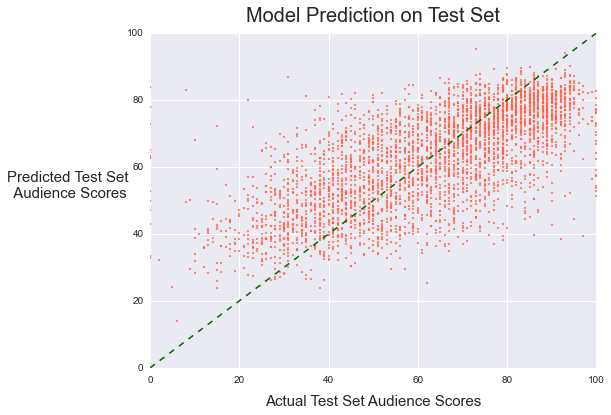

In [174]:
#THIS IS THE CORRECT MODEL AND DATA BUT ONLY ONE INITIAL TRAIN AND TEST

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

yong_seaborn = pd.DataFrame(zip(y_test, y_pred),
                               columns = ['Actual TestSet Audience Score', 'Predicted TestSet Audience Score'])

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.plot([0,100], [0,100], ls = "--", c= 'darkgreen', linewidth = 1.5)

sns.regplot(x='Actual TestSet Audience Score', y='Predicted TestSet Audience Score', data= yong_seaborn, 
            scatter_kws={'s':5}, color = 'tomato', fit_reg = False)

#Do i want this line of best fit or a line of equality?

plt.title("Model Prediction on Test Set", fontsize = 20, y=1.02)

# textstr = (r'$R^2 = 0.486$')
# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
# ax.text(80, 20, textstr, fontsize=15,
#         verticalalignment='top', color="black", bbox=props)
ax.set_xlabel("Actual Test Set Audience Scores", fontsize = 15, labelpad = 10)
ax.set_ylabel("Predicted Test Set\n Audience Scores", fontsize = 15, labelpad = 60).set_rotation(0)

# plt.savefig("Model_Pred_Test_Set.png")


In [128]:
model = LinearRegression()

In [173]:
cross_results = cross_val_score(model, newemily, emily_y, cv = 5)
for i in cross_results:
    print i
print '\n'+"Average R^2 of 5-folds Cross Validation is", str(cross_results.mean()) + "."

0.462286570888
0.475723642495
0.483222556619
0.477258535332
0.500984223426

Average R^2 of 5-folds Cross Validation is 0.479895105752.


In [133]:
cross_predict  = cross_val_predict(model, newemily, emily_y, cv=5)

In [137]:
cross_predict[:5]

array([ 78.08075477,  55.97721656,  81.57284577,  86.0126414 ,  68.63517648])

In [140]:
cross_predict = list(cross_predict)
print cross_predict[:5]

[78.080754774724213, 55.977216561734195, 81.572845771547478, 86.012641404522981, 68.635176477054515]


In [146]:
actual_results = list(emily_y)
print actual_results[:5]

[94, 45, 61, 86, 65]


In [147]:
print len(actual_results), len(cross_predict)

15032 15032


In [148]:
residuals = map(operator.sub, actual_results, cross_predict)
print residuals[:5]

[15.919245225275787, -10.977216561734195, -20.572845771547478, -0.012641404522980793, -3.6351764770545145]


In [150]:
resid_array = np.array(residuals)

In [153]:
resid_std = np.std(resid_array)
resid_mean = np.mean(resid_array)

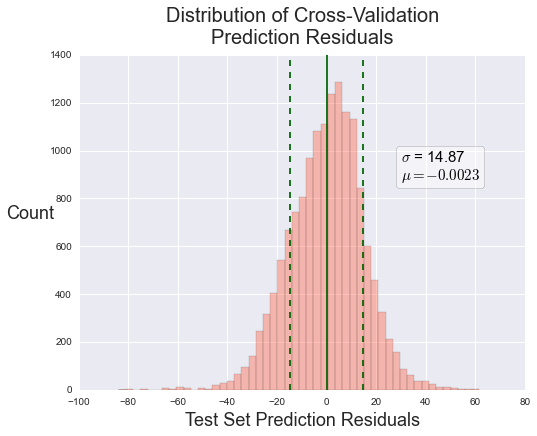

In [165]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plt.title("Distribution of Cross-Validation\nPrediction Residuals", fontsize = 20, y= 1.02)

sns.distplot(residuals, kde = False, color = "tomato")
ax.set_xlabel('Test Set Prediction Residuals', fontsize = 18)
ax.set_ylabel('Count', fontsize = 18, labelpad = 20).set_rotation(0)

ax.axvline(x = resid_mean, color = 'darkgreen')
ax.axvline(x = resid_mean + resid_std, color = 'darkgreen', ls = "--")
ax.axvline(x = resid_mean - resid_std, color = 'darkgreen', ls = "--")

textstr = (r'$\sigma$ = {0}' '\n' '$\mu = {1}$'.format
           (format(resid_std, '.2f'), format(resid_mean, '.4f')))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(30, 1000, textstr, fontsize=15,
        verticalalignment='top', color="black", bbox=props)
plt.savefig("CV_Predict_Residuals.png")

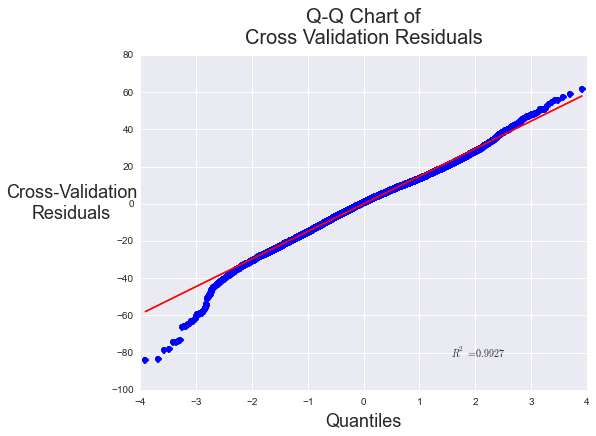

In [198]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
stats.probplot(residuals, dist="norm", plot=plt)
ax.set_title("Q-Q Chart of\nCross Validation Residuals", fontsize = 20, y= 1.02)
ax.set_xlabel('Quantiles', fontsize = 18)
ax.set_ylabel('Cross-Validation\nResiduals', fontsize = 18, labelpad = 40).set_rotation(0)
plt.show()

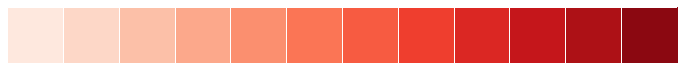

In [200]:
reds = sns.choose_colorbrewer_palette('sequential')

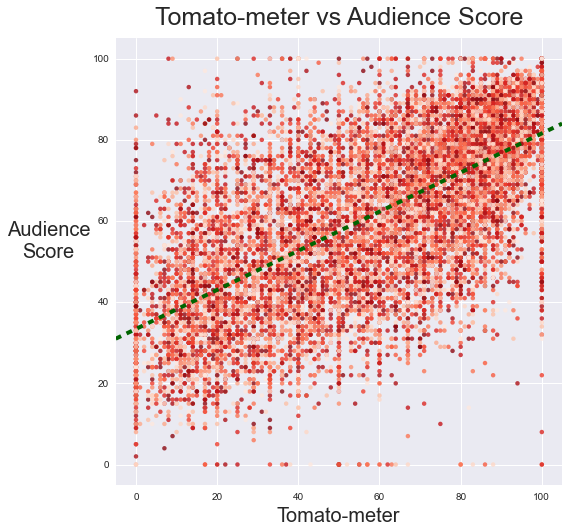

In [202]:
sns.set_style("darkgrid")

plt.figure(figsize=(8, 8))
plt.title("Tomato-meter vs Audience Score", fontsize = 25, y= 1.02)

ax = sns.regplot(x="Tomato-meter", y="Audience Score", data=bigbadpanda,fit_reg = False,
                 color = reds)
ax.set_xlim(-5,105)
ax.set_xlabel("Tomato-meter", fontsize = 20)
ax.set_ylim(-5,105)
ax.set_ylabel("Audience\nScore", fontsize = 20, labelpad = 45).set_rotation(0)
ax.plot([-5,105], [31,84], ls = "--", linewidth = 4, c= 'darkgreen')
plt.savefig("Total_Tom_vs_Aud_Scatter.png")